In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from collections import Counter
import matplotlib
import scipy

In [2]:
model = tf.keras.models.load_model( 'model12_450_调过拟合.h5' )

In [3]:
# 读取图片：3通道
def read_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels = 3)
    return img

In [17]:
# 用当前模型测试一张图：
img_test = glob.glob( r'D:\SGDownload\611_早上\未命名(2)\未命名(2)_大图\待处理png图\文中预测结果图\图像\*' )
total = len(img_test)
img = []
label = [] 

for x in range(total):
    # 从路径读取图像：
    tmp = read_image( img_test[x] )
    # 拓展一维：变成“批次”形式！
    tmp = tf.cast(tmp, tf.float32) / 127.5 - 1  # 归到[-1,1]之间！—— 和输入数据一致！
    tmp = tf.expand_dims( tmp, axis = 0 )
    # 标签预测：
    label_pred = model.predict(tmp)
    label_pred = tf.argmax( label_pred, axis = -1 )  # 每个维度上，取一个最大值！
    # 恢复原形：
    tmp = tf.squeeze( tmp, axis = 0 )
    # 存：
    img.append( tmp )
    label.append( label_pred )

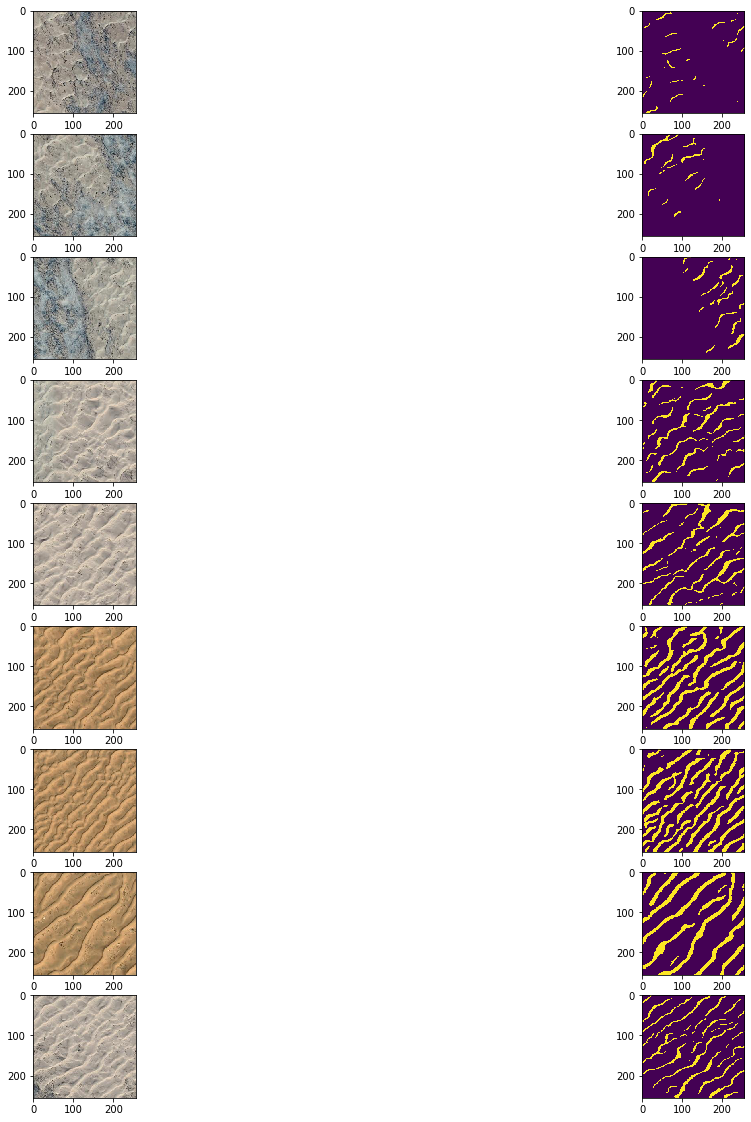

In [18]:
plt.figure( figsize=(20,20) )
for x in range( total ):
    plt.subplot(total, 2, x*2 + 1)
    plt.imshow( (img[x].numpy() + 1)/2 )
    plt.subplot(total, 2, x*2 + 2)
    plt.imshow( label[x].numpy().reshape(256,256) )

In [24]:
# 全部转为numpy：
for x in range(total):
    img[x] = img[x].numpy()
    label[x] = label[x].numpy()  # 转为数组
    label[x] = np.squeeze( label[x], axis = 0 )

In [27]:
# 保存：
index = [ int(x.split('\\')[-1].split('.')[0].split('_')[-1]) for x in img_test ]
save_path = 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/文中预测结果图/合并/'
for x in range(total):
    plt.imsave( save_path + 'label_{}.png'.format( index[x] ), label[x] )

In [33]:
c2 = np.squeeze(c2, axis = 0)
c2 = np.expand_dims(c2, axis = 2)
c22 = np.concatenate( [c2,c2,c2], axis = 2 )

In [35]:
c22.shape

(256, 256, 3)

In [37]:
c2.shape

(256, 256, 1)

In [6]:
from PIL import Image

In [25]:
width = 256*2
height = 256
save_path = 'D:/SGDownload/611_早上/未命名(2)/未命名(2)_大图/待处理png图/文中预测结果图/'
plt.imsave(save_path + 'ceshi.png', label[0])